<Figure size 1200x800 with 0 Axes>

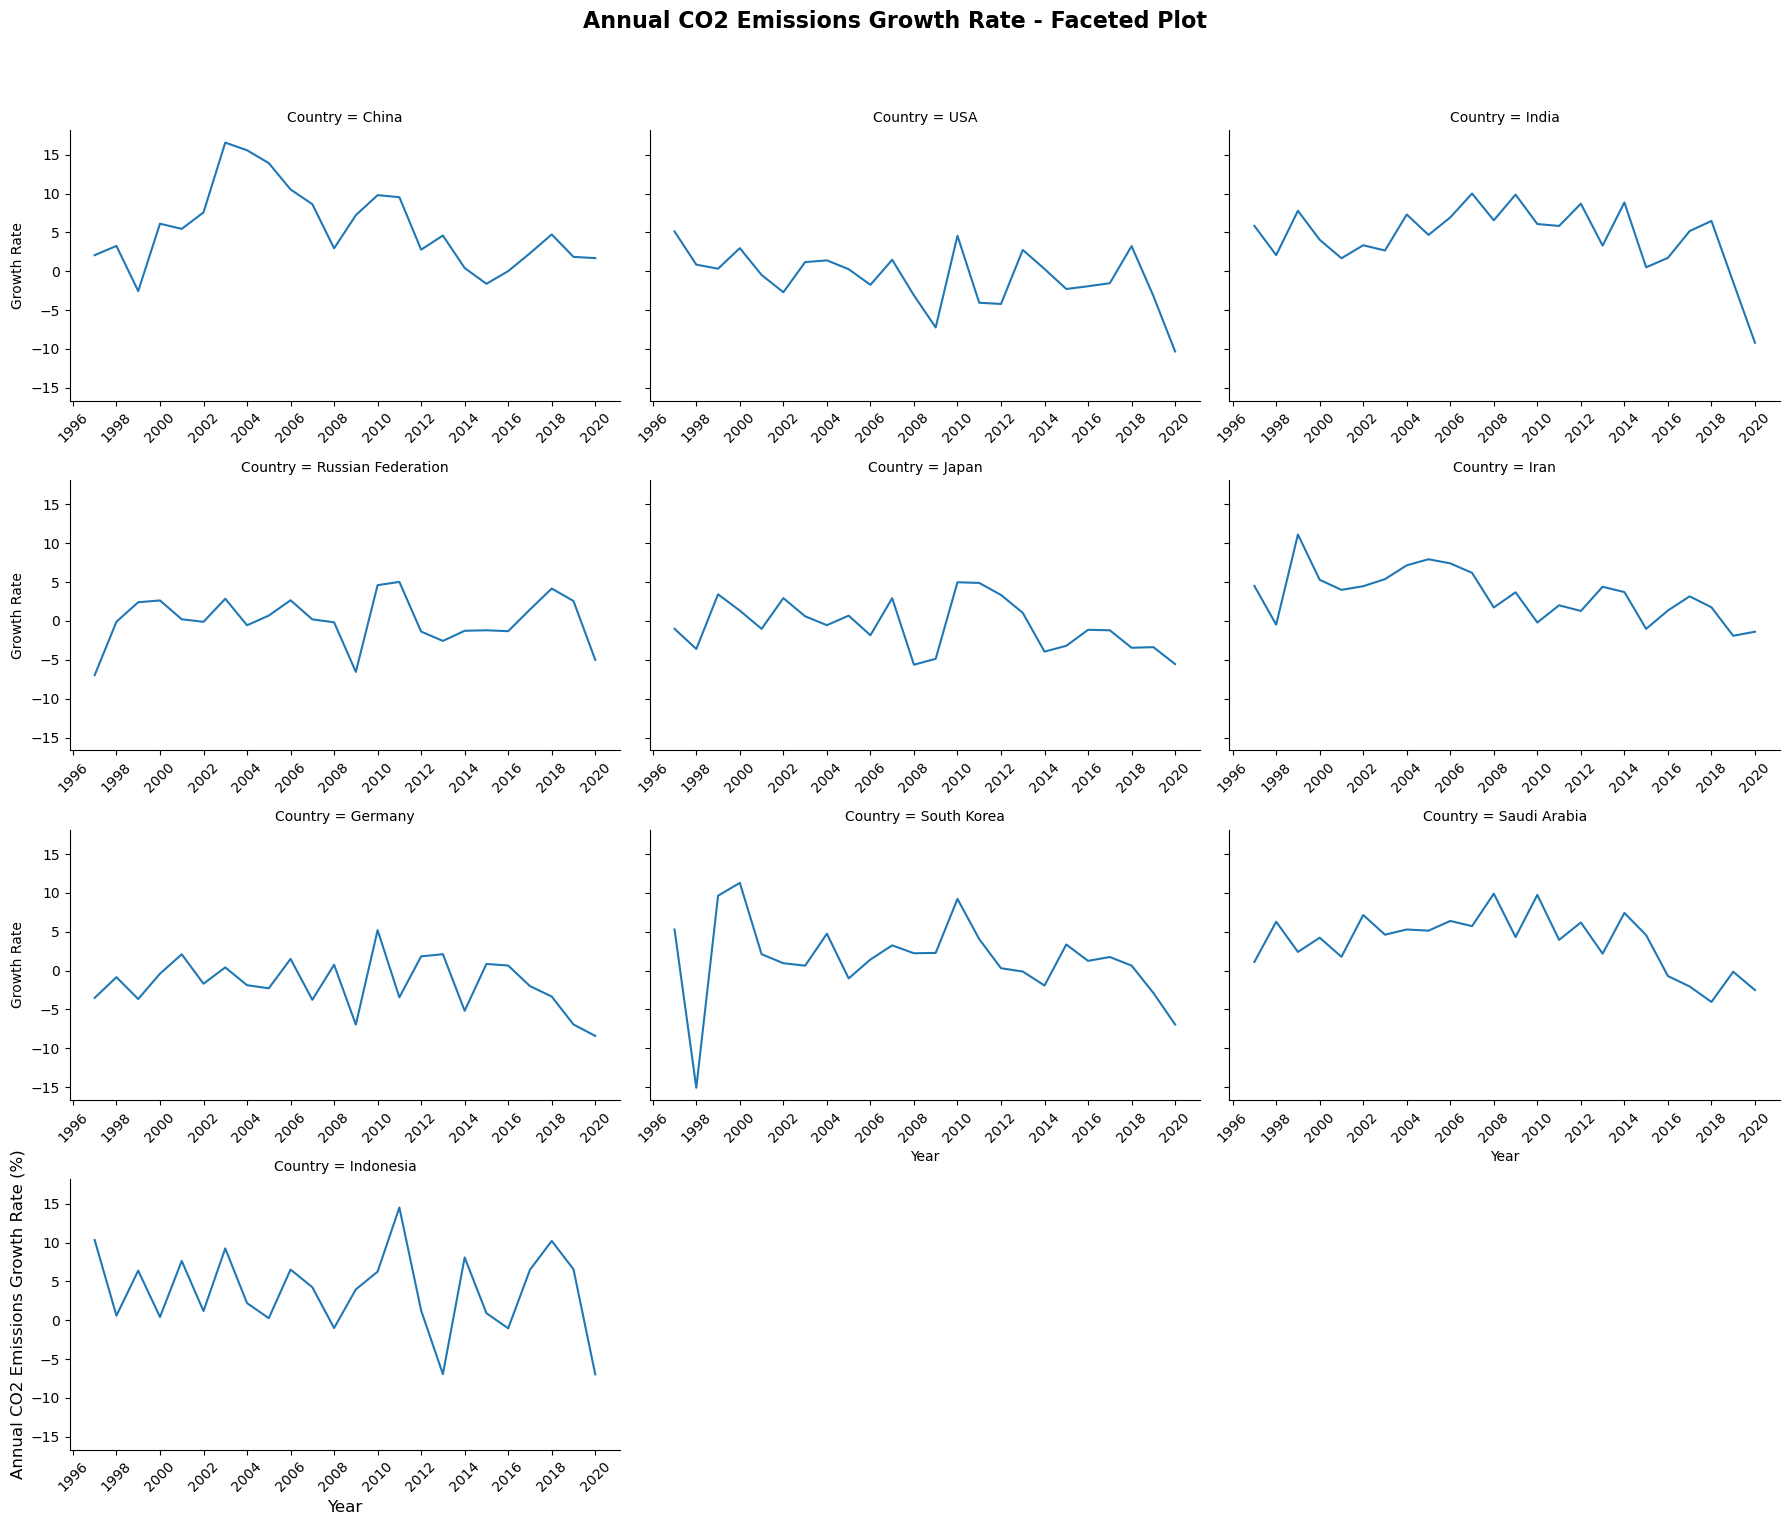

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\91910\Downloads\countries_data.csv"
co2_data = pd.read_csv(file_path, index_col=0)

# Calculate the annual growth rate for each country from 1996 to 2020
selected_columns = co2_data.columns
growth_rates = co2_data.pct_change(axis='columns') * 100

# Reshape the data for FacetGrid
growth_rates = growth_rates.transpose()
growth_rates.reset_index(inplace=True)
growth_rates = pd.melt(growth_rates, id_vars='index', var_name='Country', value_name='Growth Rate')
growth_rates.rename(columns={'index': 'Year'}, inplace=True)

# Create the faceted plot
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(growth_rates, col='Country', col_wrap=3, height=4, aspect=1.5, sharex=False)
g.map(sns.lineplot, 'Year', 'Growth Rate')

# Set x-axis labels and rotation
for ax in g.axes.flat:
    # Show every two years
    x_labels = selected_columns[::2]
    ax.set_xticks(range(0, len(selected_columns), 2))
    ax.set_xticklabels(x_labels, rotation=45)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual CO2 Emissions Growth Rate (%)', fontsize=12)
plt.suptitle('Annual CO2 Emissions Growth Rate - Faceted Plot', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()